In [101]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix


In [102]:
df = pd.read_csv(r"C:\Users\acer\Downloads\DS project\pd_speech_features.csv")
print(df)

      id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0      0       1  0.85247  0.71826  0.57227        240               239   
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
..   ...     ...      ...      ...      ...        ...               ...   
751  250       0  0.80903  0.56355  0.28385        417               416   
752  250       0  0.16084  0.56499  0.59194        415               413   
753  251       0  0.88389  0.72335  0.46815        381               380   
754  251       0  0.83782  0.74890  0.49823        340               339   
755  251       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0            0.008064  

In [103]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None


In [104]:
print(df.describe().T)


                           count        mean        std       min        25%  \
id                         756.0  125.500000  72.793721  0.000000  62.750000   
gender                     756.0    0.515873   0.500079  0.000000   0.000000   
PPE                        756.0    0.746284   0.169294  0.041551   0.762833   
DFA                        756.0    0.700414   0.069718  0.543500   0.647053   
RPDE                       756.0    0.489058   0.137442  0.154300   0.386537   
...                          ...         ...        ...       ...        ...   
tqwt_kurtosisValue_dec_33  756.0   12.375335  16.341665  1.628700   3.114375   
tqwt_kurtosisValue_dec_34  756.0   14.799230  15.722502  1.861700   3.665925   
tqwt_kurtosisValue_dec_35  756.0   14.751559  14.432979  1.955900   3.741275   
tqwt_kurtosisValue_dec_36  756.0   31.481110  34.230991  2.364000   3.948750   
class                      756.0    0.746032   0.435568  0.000000   0.000000   

                                  50%  

In [105]:
print(df.isnull())

        id  gender    PPE    DFA   RPDE  numPulses  numPeriodsPulses  \
0    False   False  False  False  False      False             False   
1    False   False  False  False  False      False             False   
2    False   False  False  False  False      False             False   
3    False   False  False  False  False      False             False   
4    False   False  False  False  False      False             False   
..     ...     ...    ...    ...    ...        ...               ...   
751  False   False  False  False  False      False             False   
752  False   False  False  False  False      False             False   
753  False   False  False  False  False      False             False   
754  False   False  False  False  False      False             False   
755  False   False  False  False  False      False             False   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0               False               False         False  ...   
1      

In [106]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


<AxesSubplot:>

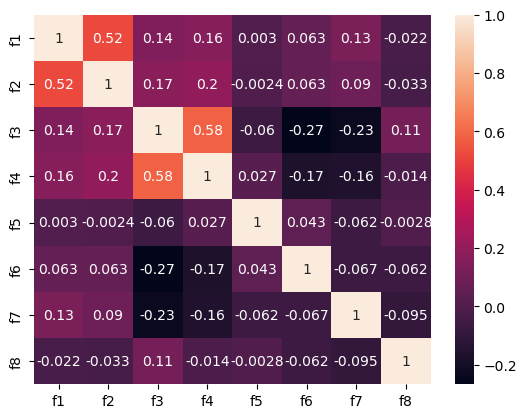

In [107]:
sns.heatmap(df[df.columns[26:34]].corr(),annot=True)

In [108]:
df[["f1","f2","f3","f4","f5","f6","f7","f8"]].corr()

,f1,f2,f3,f4,f5,f6,f7,f8
f1,1.000000,0.515531,0.143463,0.162763,0.003047,0.062551,0.131336,-0.022406
f2,0.515531,1.000000,0.170297,0.198086,-0.002428,0.062965,0.089893,-0.033312
f3,0.143463,0.170297,1.000000,0.584326,-0.059846,-0.266722,-0.228998,0.113934
f4,0.162763,0.198086,0.584326,1.000000,0.026776,-0.171053,-0.160328,-0.013879
f5,0.003047,-0.002428,-0.059846,0.026776,1.000000,0.043174,-0.061757,-0.002785
f6,0.062551,0.062965,-0.266722,-0.171053,0.043174,1.000000,-0.066627,-0.061889
f7,0.131336,0.089893,-0.228998,-0.160328,-0.061757,-0.066627,1.000000,-0.095476
f8,-0.022406,-0.033312,0.113934,-0.013879,-0.002785,-0.061889,-0.095476,1.000000


<AxesSubplot:>

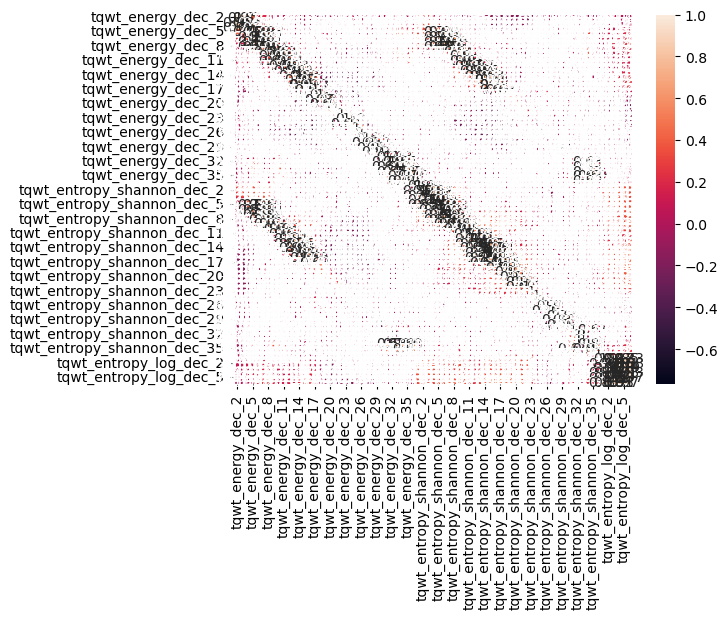

In [109]:
sns.heatmap(df[df.columns[323:400]].corr(),annot=True)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

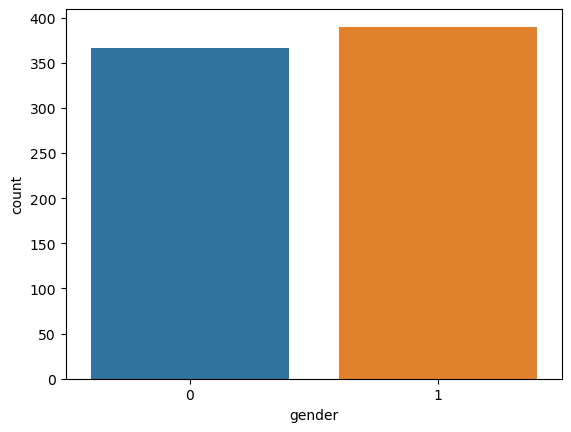

In [110]:
sns.countplot(df['gender'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

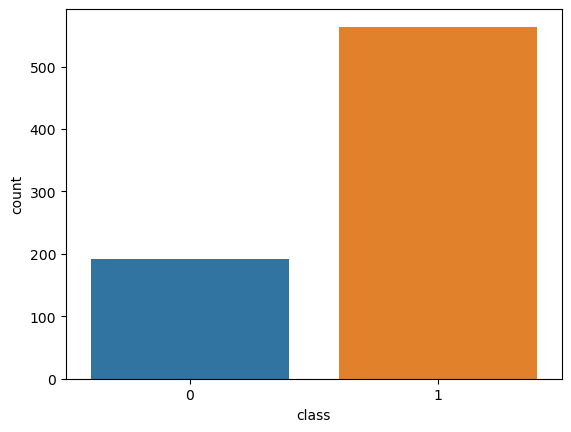

In [111]:
sns.countplot(df['class'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='numPulses', ylabel='count'>

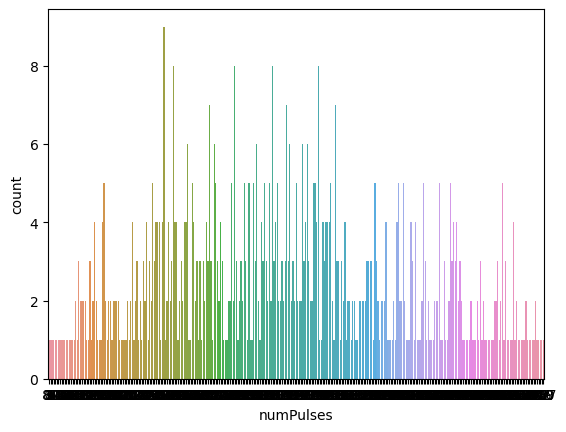

In [112]:
sns.countplot(df['numPulses'])

<AxesSubplot:xlabel='tqwt_kurtosisValue_dec_35', ylabel='Count'>

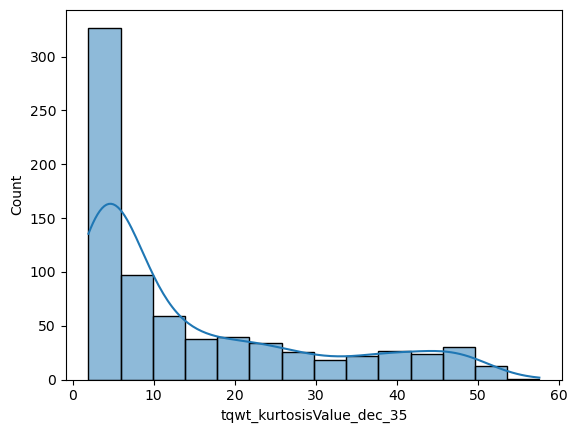

In [113]:
sns.histplot(df['tqwt_kurtosisValue_dec_35'],kde=True)

<AxesSubplot:xlabel='numPulses', ylabel='Density'>

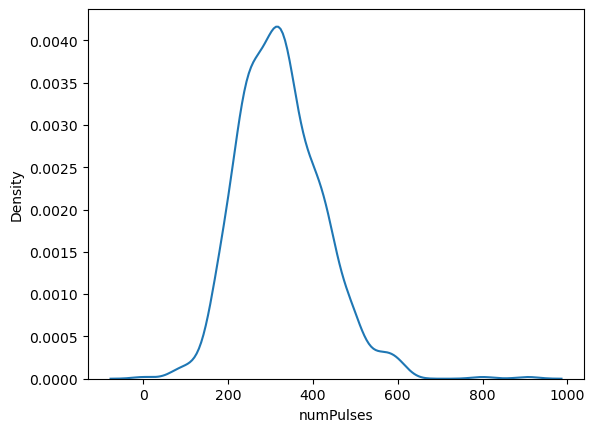

In [114]:
sns.kdeplot(df['numPulses'])

The data point is considered as being an outlier if it is outside of this interval: [ 0 784.0 ]


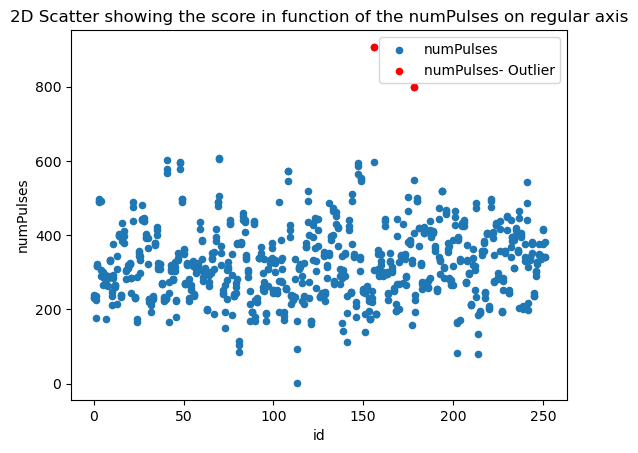

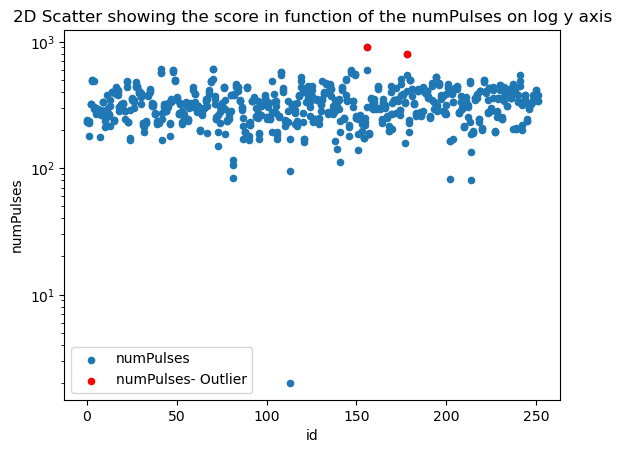

In [115]:
##Remove the outliers 
Q1 = np.percentile(df.numPulses, 25)
Q3 = np.percentile(df.numPulses, 75)
    
# Find bound
IQR = Q3 - Q1
low_outlier = max(0, Q1 - 3*IQR)
high_outlier = Q3 + 3*IQR 

print( "The data point is considered as being an outlier if it is outside of this interval: [", low_outlier , high_outlier, ']')

# Filter 
df_no_outliers = df[(df.numPulses < high_outlier) | (df.numPulses > low_outlier)]
df_out_outliers =df[(df.numPulses > high_outlier) | (df.numPulses < low_outlier)]

# Scatter plot
ax =  df_no_outliers.plot.scatter(x='id', y='numPulses', label = 'numPulses')
df_out_outliers.plot.scatter(x='id', y='numPulses', ax=ax, color='red', label = 'numPulses- Outlier')
plt.title('2D Scatter showing the score in function of the numPulses on regular axis')
plt.show()

# Scatter plot with log scale
ax =  df_no_outliers.plot.scatter(x='id', y='numPulses', label = 'numPulses', logy=True)
df_out_outliers.plot.scatter(x='id', y='numPulses', ax=ax, color='red', label = 'numPulses- Outlier', logy =True)
plt.title('2D Scatter showing the score in function of the numPulses on log y axis')
plt.show()

In [116]:
x = df.iloc[:, 0:754].values
y = df.iloc[:, -1].values 

In [117]:
x

array([[  0.     ,   1.     ,   0.85247, ...,   2.6202 ,   3.0004 ,
         18.9405 ],
       [  0.     ,   1.     ,   0.76686, ...,   6.5245 ,   6.3431 ,
         45.178  ],
       [  0.     ,   1.     ,   0.85083, ...,   2.9199 ,   3.1495 ,
          4.7666 ],
       ...,
       [251.     ,   0.     ,   0.88389, ...,   3.5377 ,   3.3545 ,
          5.0424 ],
       [251.     ,   0.     ,   0.83782, ...,   2.6801 ,   2.8332 ,
          3.7131 ],
       [251.     ,   0.     ,   0.81304, ...,   4.0116 ,   2.6217 ,
          3.1527 ]])

In [118]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 43)

In [120]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [121]:
x_train.shape

(604, 754)

In [122]:
x_test.shape

(152, 754)

In [123]:
import itertools

from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification



from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Confusion Matrix Plotting Code:

In [124]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('01')
    plt.xlabel('01')

# ROC Curve Plotting Code:

In [125]:
def plot_roc_curve(y_test, y_pred):
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(8, 6))

    # method I: plt
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right', fontsize=11)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.005, 1])
    plt.ylim([0, 1.005])
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.grid(color='r', linestyle='--', linewidth=0.2)
    plt.show()

# Testing Different Classifiers:
- Discriminative Classifiers:
1) Naive Bayes Classifier:

--------------------------------------------------------
||====================================================||
|| Train Accuracy GaussianNB Model :=> 85.76%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy GaussianNB Model :=> 75.00%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - GaussianNB Model :=> 8.63  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 75.67% +- 5.43%  ||
||====================================================

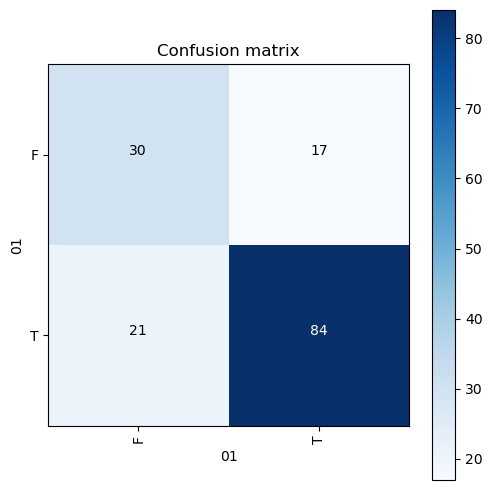

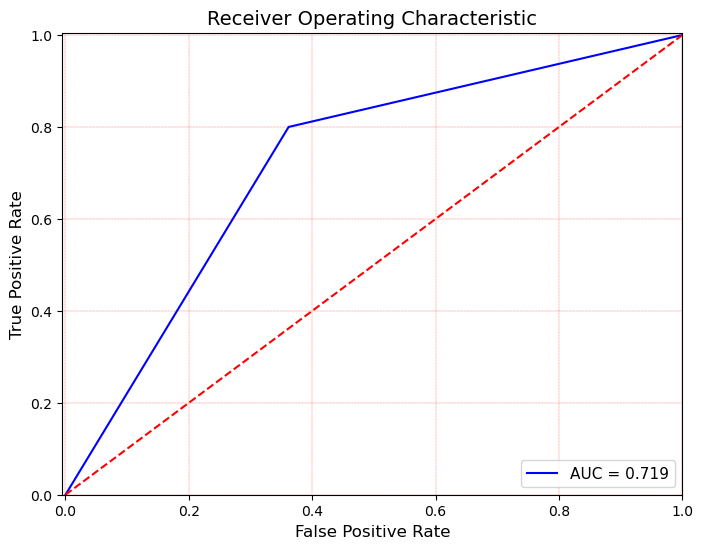

In [126]:
def my_GaussianNB(X_train, y_train, X_test, y_test, X, y):
    clf = GaussianNB()

    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - GaussianNB Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_GaussianNB(X_train, y_train, X_test, y_test, X, y)

# Minimum Distance Classifier:

--------------------------------------------------------
||====================================================||
|| Train Accuracy Minimum Distance Model :=> 72.19%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Minimum Distance Model :=> 72.37%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Minimum Distance Model :=> 9.54  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 70.24% +- 3.68%  ||
||==================================

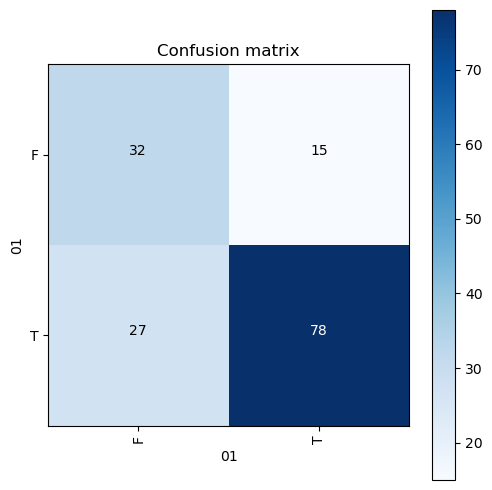

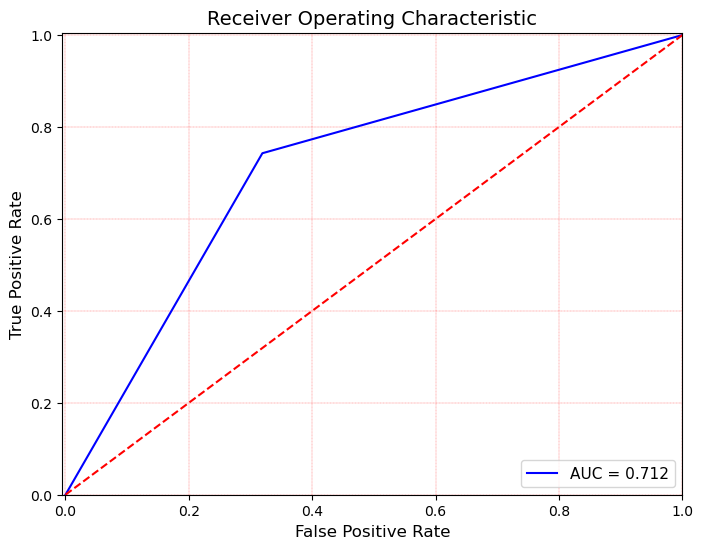

In [127]:
from sklearn.neighbors import NearestCentroid

def my_NearestCentroid(X_train, y_train, X_test, y_test, X, y):
    clf = NearestCentroid(metric='euclidean')
    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy Minimum Distance Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Minimum Distance Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Minimum Distance Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_NearestCentroid(X_train, y_train, X_test, y_test, X, y)

#  Logistic Regression

--------------------------------------------------------
||====================================================||
|| Train Accuracy LogisticRegression Model :=> 93.21%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy LogisticRegression Model :=> 82.24%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - LogisticRegression Model :=> 6.14  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 77.12% +- 1.70%  ||
||============================

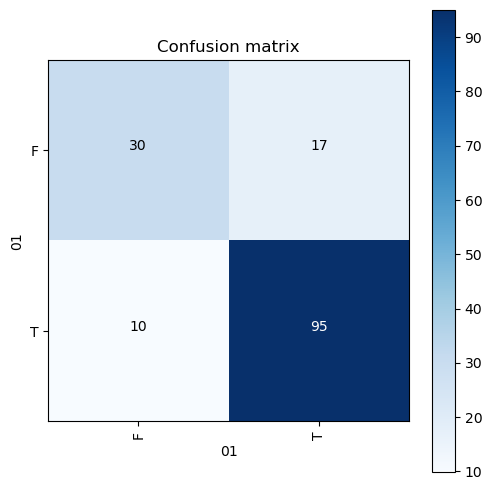

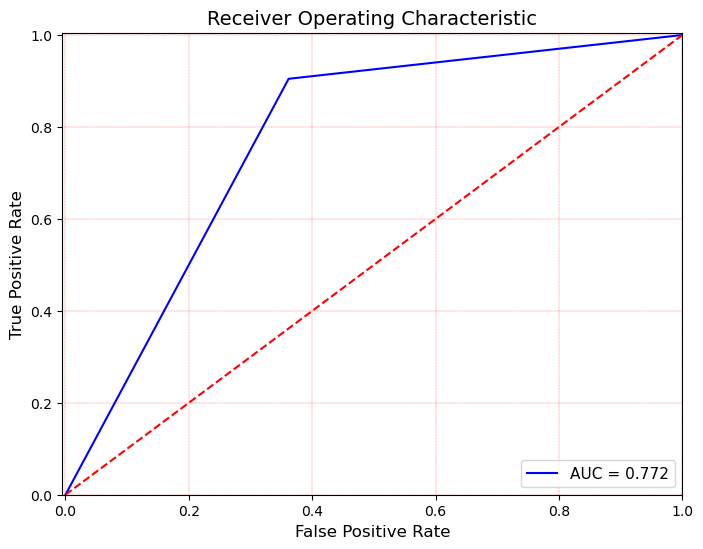

In [128]:
from sklearn.linear_model import LogisticRegression

def my_LogisticRegression(X_train, y_train, X_test, y_test, X, y):
    clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - LogisticRegression Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)


my_LogisticRegression(X_train, y_train, X_test, y_test, X, y)

# KNeighbors Classifier:

C:\Users\acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

--------------------------------------------------------
||====================================================||
|| Train Accuracy KNN Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy KNN Model :=> 62.50%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - KNN Model :=> 12.95  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 68.11% +- 6.51%  ||
||====================================================||
----------------

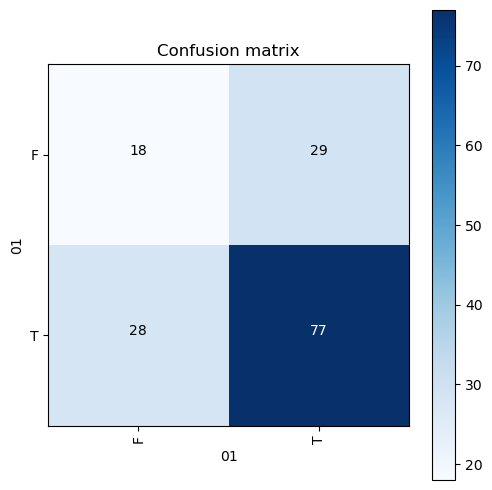

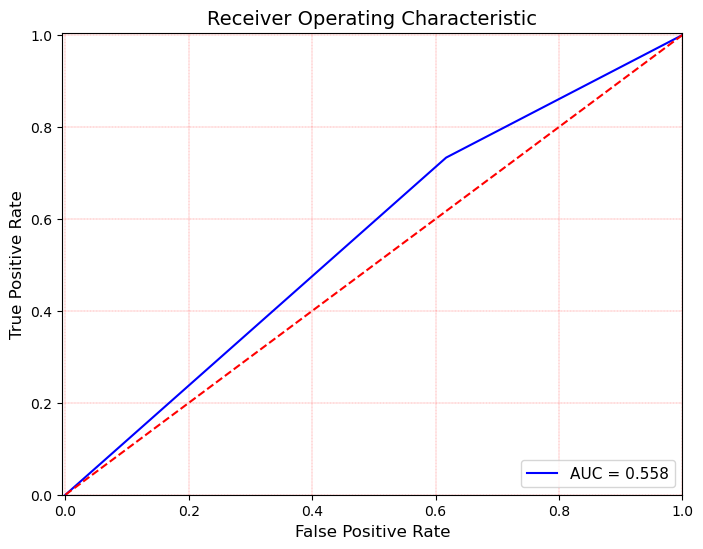

In [129]:
from sklearn.neighbors import KNeighborsClassifier

def my_KNN(x_train, y_train, x_test, y_test, x, y):
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)
    y_pred_train = clf.predict(x_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_KNN(x_train, y_train, x_test, y_test, x, y)

#  Decision Tree Classifier:

--------------------------------------------------------
||====================================================||
|| Train Accuracy Decision Tree Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Decision Tree Model :=> 81.58%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Decision Tree Model :=> 6.36  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 76.19% +- 2.82%  ||
||==========================================

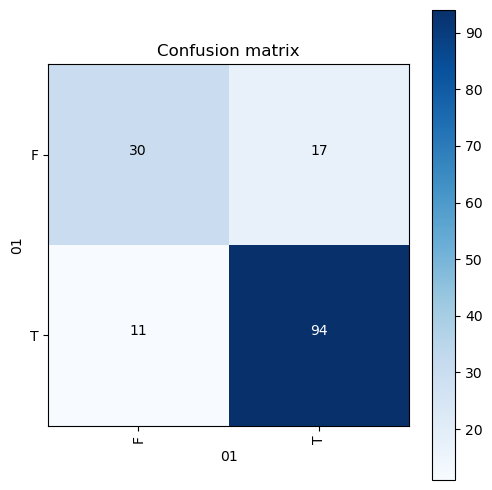

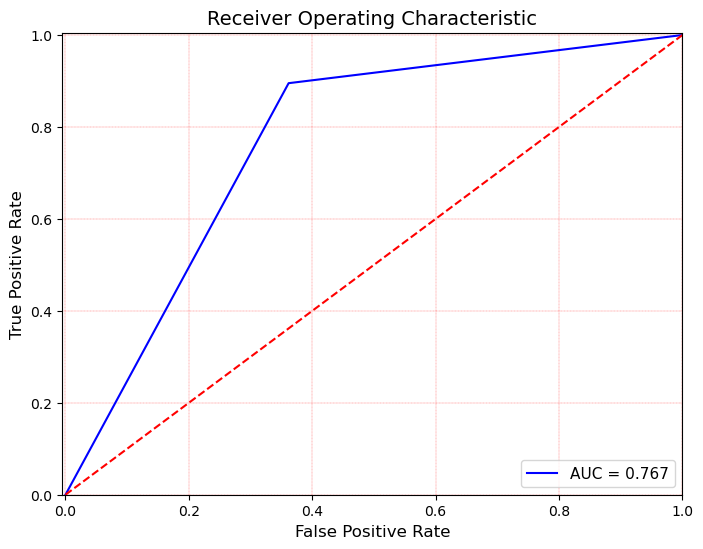

In [130]:
from sklearn import tree

def my_Tree(X_train, y_train, X_test, y_test, X, y):
    clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, 
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                    class_weight='balanced', ccp_alpha=0.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Decision Tree Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100, np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_Tree(X_train, y_train, X_test, y_test, X, y)